In [1]:
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
from utils.save_read_graph import read
from section3.scenario1 import scenario_1
from section3.scenario3 import Scenario3

In [8]:
def print_table(d):
    print ("{:<8} {:<15} {:<10} {:<10}".format('Year','Stations (unit)','Small (%)'
                                               ,'Medium Station(%)', 'Large Stations (%)'
                                               , 'Demand Satisfied (%)', 'Yearly Profit (Euro)'
                                               )
                                               )
    for k, v in d.items():
        ns, s, m, l, ds, yp = v
        print ("{:<8} {:<15} {:<10} {:<10}".format(k, ns, s, m, k, ds, yp))

def phase_summary(station_size, market_demand, fulfilled_demand, profit_ton, cost, operation_rate, profit_margin=0.2):
    """ Computes summary statistics at each phase.
    
    Inputs:
        station_size (dict): dictionary containing size of nodes
        market_demand (dict): dictionary containing market demand per node
        fulfilled_demand (dict): dictionary containing demand we satisfy per node
        profit_ton (dict): dictionary containing profit per node

        cost (float/int): cost of production per ton of hydrogen
        operation_rate (float): the percentage of days where a station will be in operation
        profit_margin (float): the profit margin to simulate the price
    Returns:
        Tuple of summary statistics

    """
    ns, s, m, l = n_stations(station_size)
    ds = demand_satisfied_per(market_demand, fulfilled_demand)
    yp = profit_euro_year(profit_ton, cost, operation_rate, profit_margin)
    return ns, s, m, l, ds, yp

def n_stations(station_size):
    """ Summary of the number of stations in a network.
    Input:
    station_size (dict): dictionary containing size of nodes
        key = node_id 
        value = 0 (no station) 1(small station) 2 (medium station) 3 (large station)
    
    Returns:
        total number of stations
        percentage of small stations
        percentage of medium stations
        percentage of large stations
    
    """
    station_cnt =  len([v for v in station_size.values() if v >0])
    small_cnt = len([v for v in station_size.values() if v ==1]) 
    medium_cnt = len([v for v in station_size.values() if v ==2]) 
    large_cnt = len([v for v in station_size.values() if v ==3]) 
    return  station_cnt, small_cnt / station_cnt, medium_cnt / station_cnt, large_cnt / station_cnt



def demand_satisfied_per(market, our):
    """ Compute the percentage of demand in t/day satisfied by our deployement strategy.
    Input:
    market (dict): dictionary containing market demand per node
    our (dict): dictionary containing demand we satisfy per node

        key = node_id 
        value = demand in ton/day
    
    """

    total_market = sum(list(market.values()))
    total_our = sum(list(our.values()))
    return total_our / total_market

def profit_euro_year(profit_ton, cost, operation_rate, profit_margin=0.2):
    """ Compute the profit per year in euro based on cost and profit margin.
    Input:
    profit_ton (dict): dictionary containing profit per node
        key = node_id 
        value = demand in ton/day
    cost (float/int): cost of production per ton of hydrogen
    operation_rate (float): the percentage of days where a station will be in operation
    profit_margin (float): the profit margin to simulate the price
    """
    total_profit_ton = sum(list(profit_ton.values()))
    return total_profit_ton * (cost * (1+profit_margin)) * (365 * operation_rate)

In [ ]:
phase_summary(
    
)

In [3]:
data_path = './data/'
network_path = './networks/p400R400000/'
cn, x, y = read(network_path)
x = {int(k): v for k, v in x.items() }
scenario_1(cn, x,visualization=False, metrics=False)



In [6]:
cn.nodes(data='S3P1_station_size')

NodeDataView({0: 0, 1: 2, 2: 3, 3: 0, 4: 3, 5: 0, 6: 3, 7: 0, 8: 0, 9: 0, 10: 3, 11: 0, 12: 0, 13: 0, 14: 0, 15: 2, 16: 3, 17: 0, 18: 3, 19: 3, 20: 0, 21: 0, 22: 0, 23: 0, 24: 3, 25: 0, 26: 3, 27: 3, 28: 0, 29: 0, 30: 3, 31: 0, 32: 3, 33: 3, 34: 0, 35: 3, 36: 0, 37: 3, 38: 3, 39: 3, 40: 0, 41: 0, 42: 3, 43: 3, 44: 3, 45: 3, 46: 0, 47: 0, 48: 3, 49: 3, 50: 0, 51: 0, 52: 3, 53: 0, 54: 3, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 3, 67: 3, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 3, 74: 3, 75: 0, 76: 3, 77: 0, 78: 0, 79: 0, 80: 3, 81: 0, 82: 3, 83: 0, 84: 3, 85: 0, 86: 0, 87: 3, 88: 3, 89: 3, 90: 0, 91: 3, 92: 0, 93: 0, 94: 0, 95: 3, 96: 0, 97: 0, 98: 0, 99: 3, 100: 0, 101: 3, 102: 3, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 3, 109: 3, 110: 3, 111: 3, 112: 3, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 3, 120: 3, 121: 0, 122: 0, 123: 0, 124: 0, 125: 3, 126: 0, 127: 0, 128: 0, 129: 0, 130: 3, 131: 0, 132: 0, 133: 0, 134: 3, 135: 0, 136: 3, 

#Station by size scenario 1, 1: 4, 2: 20, 3: 311
#Station by size scenario 3, 1: 24, 2: 24, 3: 283
Number of tons covered by our network scenario 1: 1282.4608430052965
Number of tons covered by our network scenario 3: 1182.9939895550654
Number of tons sold in profit in our network: 443.7939895550649


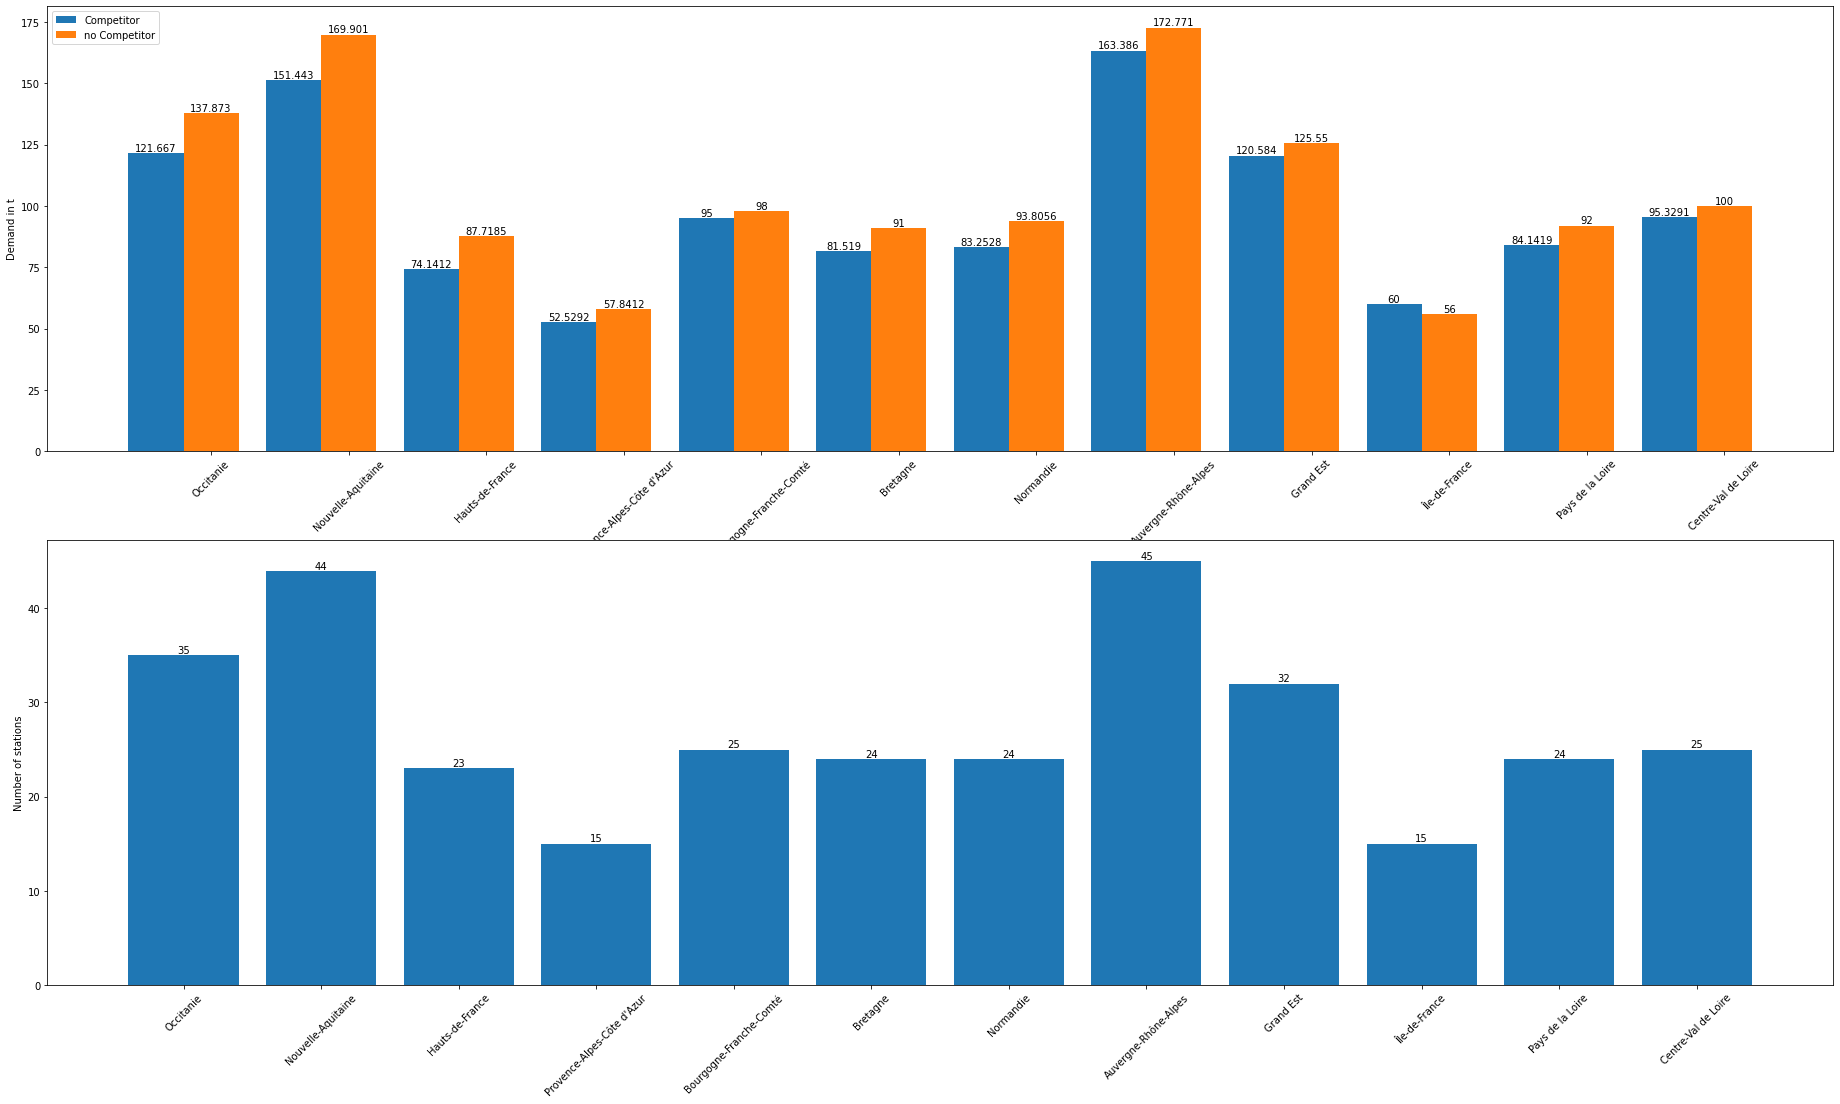

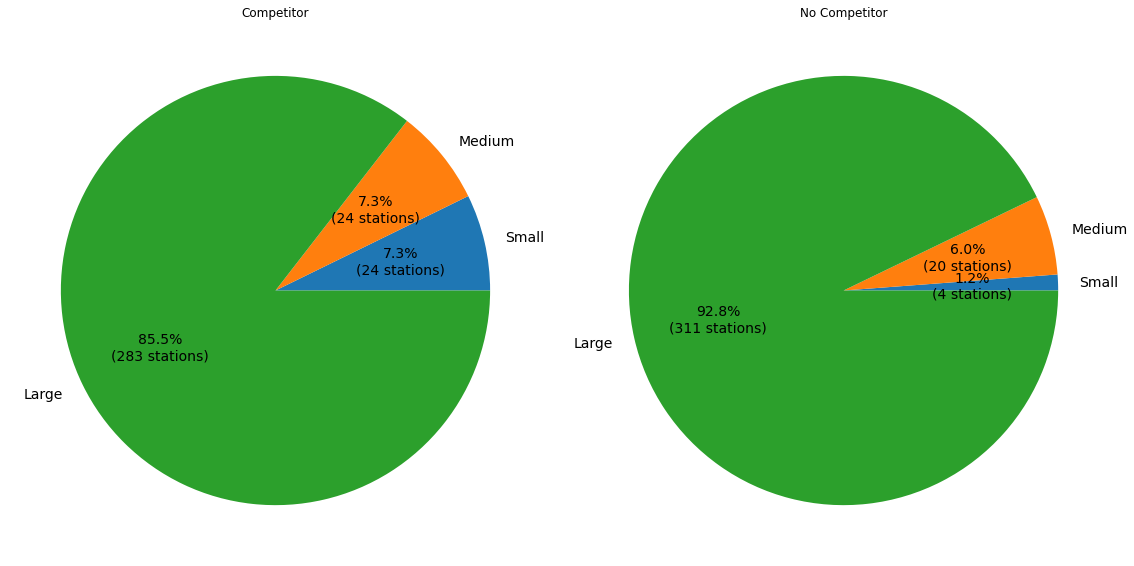

In [6]:
s3 = Scenario3(data_path, cn, x)

s3.summary()


In [7]:
s3.describe()

We plan to deploy 331 H2 stations
The existent player has 327 in France Metropole
113 stations lies within our transportation network
22 stations or  0.066 percent collapse with our deployment plan


#Station by size, 1: 0, 2: 87, 3: 93
Number of tons covered by our network: 393.8995428058016
Number of tons sold in profit in our network: 53.221823987088925
total estimated market demand in our network: 481.7813128272744


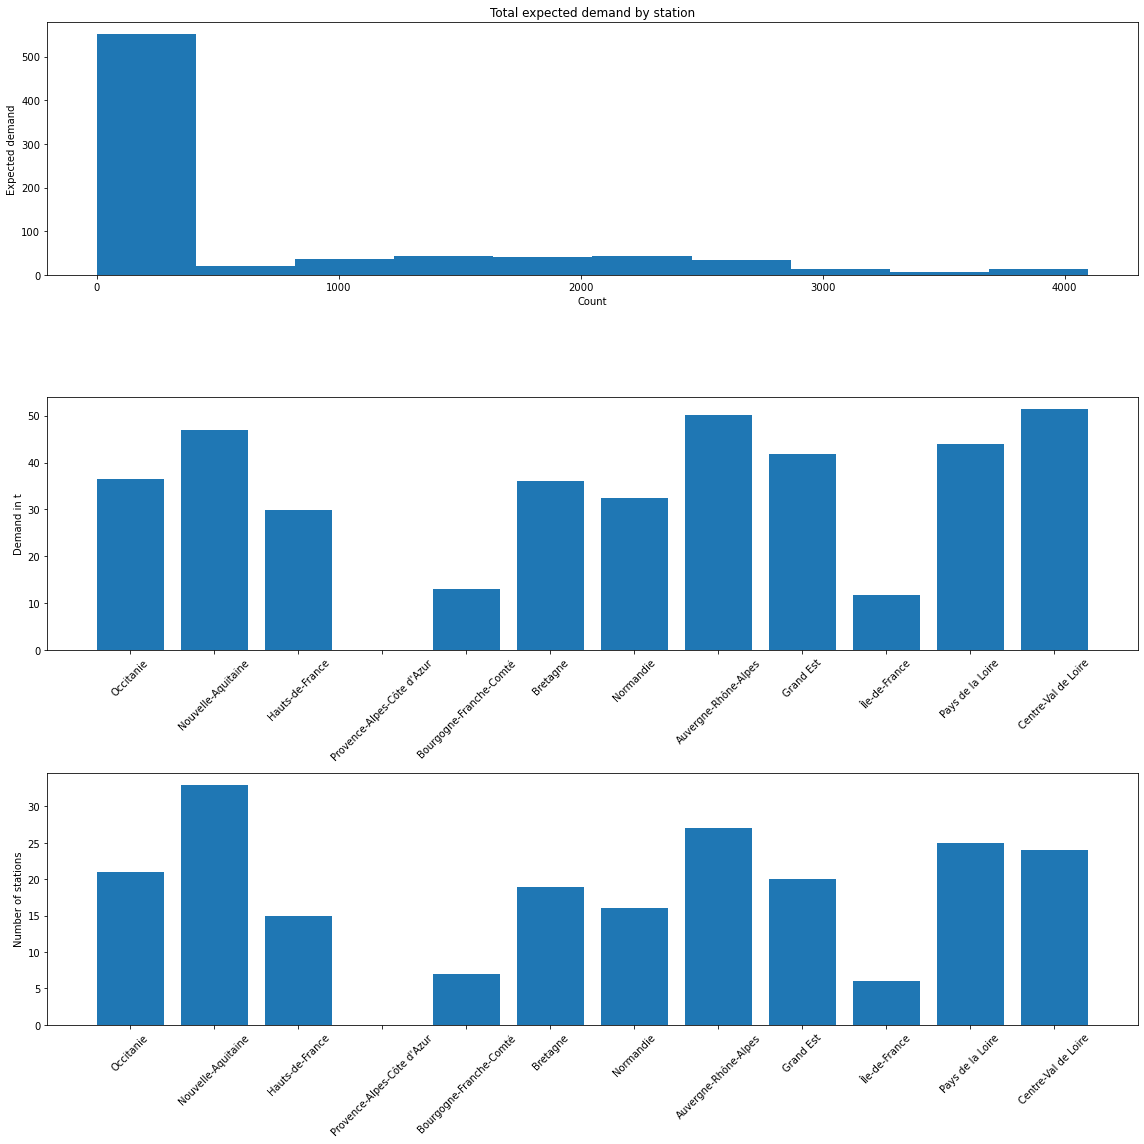

In [79]:
s3.summary()